# Simple example of time series forecasting using AutoML

#### FEDOT version = 0.3.0

In [ ]:
pip install fedot==0.3.0

[Original repository on GitHub](https://github.com/nccr-itmo/FEDOT)

This notebook was prepared by [Natural Systems Simulation Team](https://github.com/ITMO-NSS-team)

--- 

Below is a case with time series forecasting using the AutoML framework FEDOT. Simple example with API functions is shown.

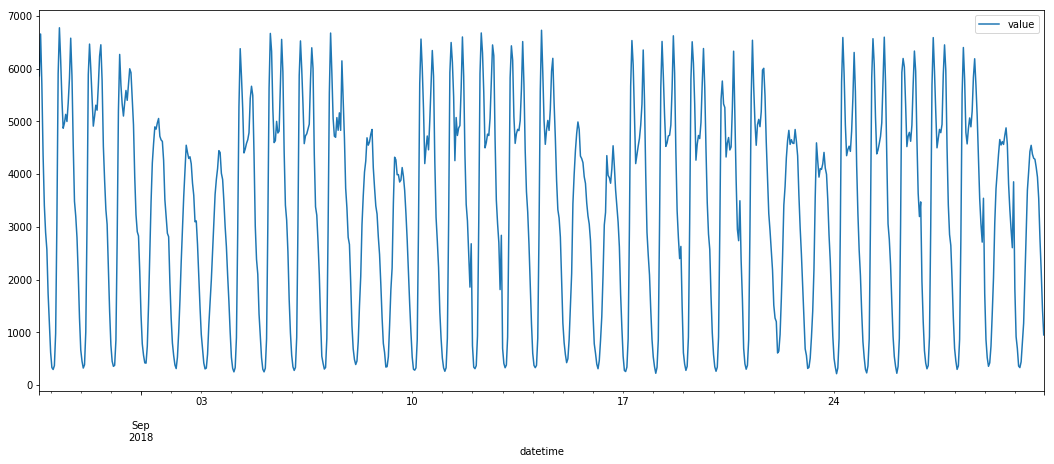

Length of the time series - 801


In [1]:
# Additional imports 
import pandas as pd 
import numpy as np

# Metric MAE
from sklearn.metrics import mean_absolute_error

# Imports for creating plots
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 18, 7

# Import data
df = pd.read_csv('ts_traffic.csv', parse_dates=['datetime'])

# Plot data
df.plot('datetime', 'value')
plt.show()

print(f'Length of the time series - {len(df)}')

# numpy array with time series
traffic = np.array(df['value'])

Data: hourly traffic volume values. From the plot, you can see 2 peaks for each cycle: morning and evening, as well as a decrease in traffic on weekends.

Let's prepare a function for drawing forecasts and measuring accuracy

In [2]:
def display_results(actual_time_series, predicted_values, len_train_data, y_name = 'Traffic volume'):
    """
    Function for drawing plot with predictions and check metrics
    
    :param actual_time_series: the entire array with one-dimensional data
    :param predicted_values: array with predicted values
    :param len_train_data: number of elements in the training sample
    :param y_name: name of the y axis
    """
    
    plt.plot(np.arange(0, len(actual_time_series)), 
             actual_time_series, label = 'Actual values', c = 'green')
    plt.plot(np.arange(len_train_data, len_train_data + len(predicted_values)), 
             predicted_values, label = 'Predicted', c = 'blue')
    # Plot black line which divide our array into train and test
    plt.plot([len_train_data, len_train_data],
             [min(actual_time_series), max(actual_time_series)], c = 'black', linewidth = 1)
    plt.ylabel(y_name, fontsize = 15)
    plt.xlabel('Time index', fontsize = 15)
    plt.legend(fontsize = 15, loc='upper left')
    plt.grid()
    plt.show()
    
    mae_value = mean_absolute_error(actual_time_series[len_train_data:], predicted_values)
    print(f'MAE value: {mae_value}')

## Forecasting using FEDOT

In [12]:
# fedot api
from fedot.api.main import Fedot

# Tasks to solve
from fedot.core.repository.tasks import Task, TaskTypesEnum, TsForecastingParams

# Input data for fit and predict
from fedot.core.data.data import InputData

# Train and test split 
from fedot.core.data.data import train_test_data_setup

# Data types in FEDOT
from fedot.core.repository.dataset_types import DataTypesEnum

### Prepare data

Initialize the task of predicting a time series 144 elements ahead

In [13]:
# forecast horizon for model
forecast_length = 144
task = Task(TaskTypesEnum.ts_forecasting,
            TsForecastingParams(forecast_length=forecast_length))

In [14]:
# Load data from csv file and wrap it into InputData structure
input_data = InputData.from_csv_time_series(task, 'ts_traffic.csv', target_column='value')

# Divide into train and test 
train_data, test_data = train_test_data_setup(input_data)

### Initialise FEDOT model 

Fit it and make prediction

*Due to the specifics of the jupiter notebooks format, in order not to overload the page with unnecessary logs, we do not show the cell output below.

In [ ]:
# Init model for the time series forecasting
model = Fedot(problem='ts_forecasting', task_params=task.task_params)

# Run AutoML model design in the same way
chain = model.fit(features=train_data)

In [19]:
# Use model to obtain forecast
forecast = model.predict(features=test_data)

Display forecast and metrics

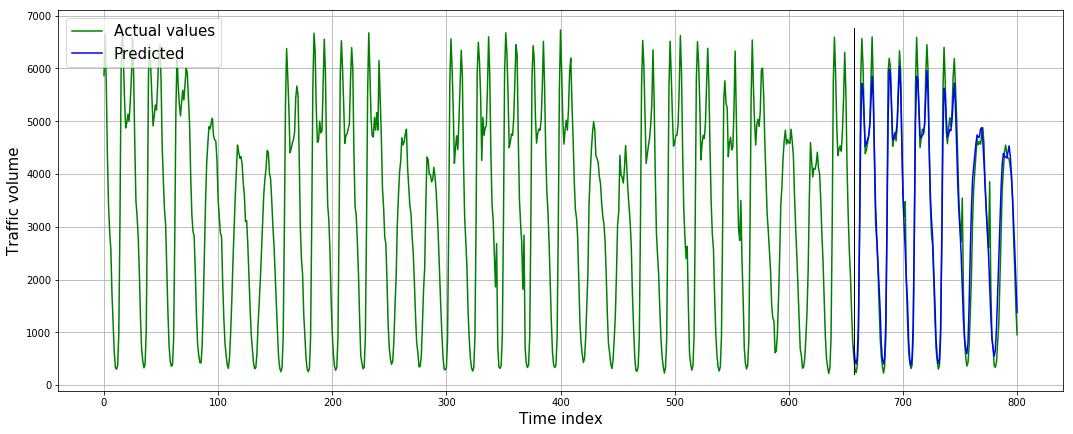

MAE value: 311.75246412037035


In [20]:
display_results(traffic, forecast, len(train_data.features))

### Chain visualization

Let's see what model we got

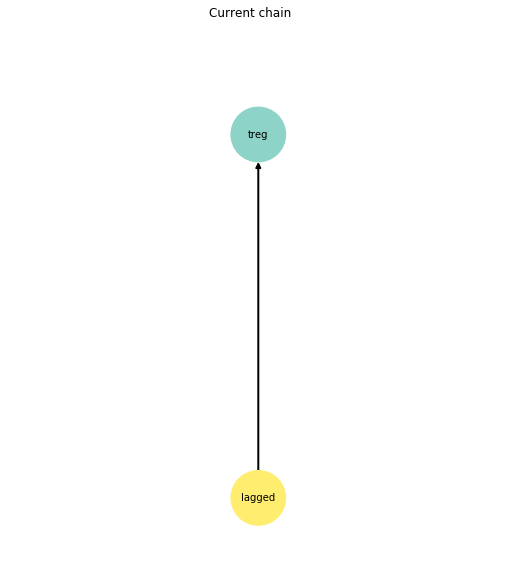

Obtained chain:
treg, params: {'bootstrap': False, 'max_features': 0.9992276998381748, 'min_samples_leaf': 3, 'min_samples_split': 7, 'n_estimators': 100}
lagged, params: {'window_size': 133.93306874117158}


In [21]:
chain.show()

print('Obtained chain:')
for node in chain.nodes:
    print(f'{node.operation}, params: {node.custom_params}')